# Senior Digital Marketing Analyst Task

# Case Study 1
## Context

Our Media Buying department handles numerous advertising campaigns across different platforms. These campaigns generate vast amounts of data, including metrics such as CPC (Cost Per Click), CTR (Click-Through Rate), and CR (Conversion Rate). This data needs to be analyzed to identify optimization opportunities and enhance the effectiveness of our media buying strategies. Additionally, we often conduct hypothesis testing to determine the best approaches for improving campaigns (KPIs). 

## Objectives
1. To identify patterns, trends, and correlations that can provide insights into campaign performance.
2. Formulate and test hypotheses related to campaign optimization.

## Deliverables
 1. Report visualizing the findings 
 2. Actionable insights and recommendations 
 

## Data set (240 rows x 9 columns):

- Campaign_ID: unique id for campaigns
- Date: campaign starting date
- Hour: time (hour)
- Geography: user location (continent) 
- Ad_Type: type of advertisement
- Impression: how many users were exposed to the advertisement
- Clicks: how many users clicked on the ads
- Conversions: how many users converted (done a key event)
- Cost: cost of the campaign

## Analysis Case study 1

### Data Preparation
-	Data cleaning: There are no missing, duplicated, or erroneous values.
-	Data Transformation: Converting data type for (Date, Hour) into datetime64.
-	Creating a new column DateTime to incorporate date and time together.

In [104]:

# Importing necessary library and loading the data set

import pandas as pd

# Read the CSV file into a DataFrame
file_path = 'dataset.csv'
df = pd.read_csv(file_path)

#   Check for missing data
missing_data = df.isnull().sum()

#  Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Display the results of the checks
missing_data, duplicate_rows


(Campaign_ID    0
 Date           0
 Hour           0
 Geography      0
 Ad_Type        0
 Impressions    0
 Clicks         0
 Conversions    0
 Cost           0
 dtype: int64,
 0)

**No missing or duplicate values.** 

In [106]:

# Display the DataFrame 
df.head()

,Campaign_ID,Date,Hour,Geography,Ad_Type,Impressions,Clicks,Conversions,Cost
0,1,01/01/2023,0,North America,Video,5000,225,23,450
1,2,01/01/2023,1,North America,Video,4800,194,20,427
2,3,01/01/2023,2,North America,Video,4600,165,16,405
3,4,01/01/2023,3,North America,Video,4400,138,14,383
4,5,01/01/2023,4,North America,Video,4200,113,11,360


In [107]:

# Display the data types of all columns
data_types = df.dtypes

# Display the results of the checks
data_types

Campaign_ID     int64
Date           object
Hour            int64
Geography      object
Ad_Type        object
Impressions     int64
Clicks          int64
Conversions     int64
Cost            int64
dtype: object

The **Date** & **Hour** are not in proper data type. 

In [109]:

# Convert the 'date' column from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Ensure "Hour" column is in string format
df['Hour'] = df['Hour'].astype(str)

# Append ":00:00" to make it a complete time string
df['Hour_Converted'] = df['Hour'] + ":00:00"
                                      
# Combine "Date" and "Hour" into a single datetime column
df['DateTime'] = df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Hour_Converted']

df['DateTime'] = pd.to_datetime(df['DateTime'])

#print(df.dtypes)
df.head()

,Campaign_ID,Date,Hour,Geography,Ad_Type,Impressions,Clicks,Conversions,Cost,Hour_Converted,DateTime
0,1,2023-01-01,0,North America,Video,5000,225,23,450,0:00:00,2023-01-01 00:00:00
1,2,2023-01-01,1,North America,Video,4800,194,20,427,1:00:00,2023-01-01 01:00:00
2,3,2023-01-01,2,North America,Video,4600,165,16,405,2:00:00,2023-01-01 02:00:00
3,4,2023-01-01,3,North America,Video,4400,138,14,383,3:00:00,2023-01-01 03:00:00
4,5,2023-01-01,4,North America,Video,4200,113,11,360,4:00:00,2023-01-01 04:00:00


In [152]:

# Display the data types of all columns to see the check Date and DateTime 
data_types = df.dtypes

# Display the results of the checks
data_types

Campaign_ID                int64
Date              datetime64[ns]
Hour                      object
Geography                 object
Ad_Type                   object
Impressions                int64
Clicks                     int64
Conversions                int64
Cost                       int64
Hour_Converted            object
DateTime          datetime64[ns]
dtype: object

## Descriptive Statistics
- Summary Statistics: Let's calculate mean, median, standard deviation, min, and max for numerical variables (Impression, Clicks, Conversions, Cost).
- Frequency Counts: Count unique values and frequencies for categorical variables (Campaign_ID, Geography, Ad_Type)


In [113]:

# Summary Statistics for numerical variables
summary_stats = df[['Impressions', 'Clicks', 'Conversions', 'Cost']].describe()

# Calculate additional statistics: mean, median, standard deviation
additional_stats = df[['Impressions', 'Clicks', 'Conversions', 'Cost']].agg(['median'])

# Frequency Counts for categorical variables
frequency_counts_geography = df['Geography'].value_counts()
frequency_counts_ad_type = df['Ad_Type'].value_counts()

# Display the summary statistics
summary_stats, additional_stats, frequency_counts_geography, frequency_counts_ad_type

(        Impressions      Clicks  Conversions         Cost
 count    240.000000  240.000000   240.000000   240.000000
 mean    7746.875000  365.683333    31.595833   770.975000
 std     2422.575272  193.002351    22.607789   347.432507
 min     4000.000000   90.000000     8.000000   324.000000
 25%     5475.000000  204.250000    15.750000   485.000000
 50%     7750.000000  315.000000    23.000000   632.000000
 75%     9600.000000  511.500000    38.500000  1023.000000
 max    13600.000000  882.000000   106.000000  1764.000000,
         Impressions  Clicks  Conversions   Cost
 median       7750.0   315.0         23.0  632.0,
 Geography
 North America    90
 Europe           90
 Asia             60
 Name: count, dtype: int64,
 Ad_Type
 Video     90
 Banner    90
 Native    60
 Name: count, dtype: int64)

## Analysis Objective 1: Identify patterns, trends, and correlations that can provide insights into campaign performance.
### Patterns (Univariate Analysis)

- Histograms and boxplots for numerical variables to understand their distributions.- Bar plots for categorical variables to see the distribution of campaigns across 

**Histograms and boxplots for numerical variables to understand their distributions**

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


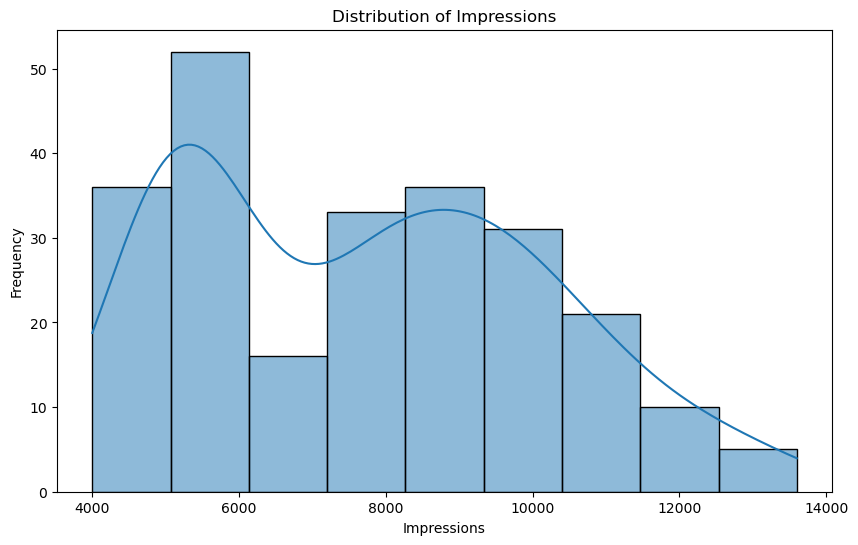

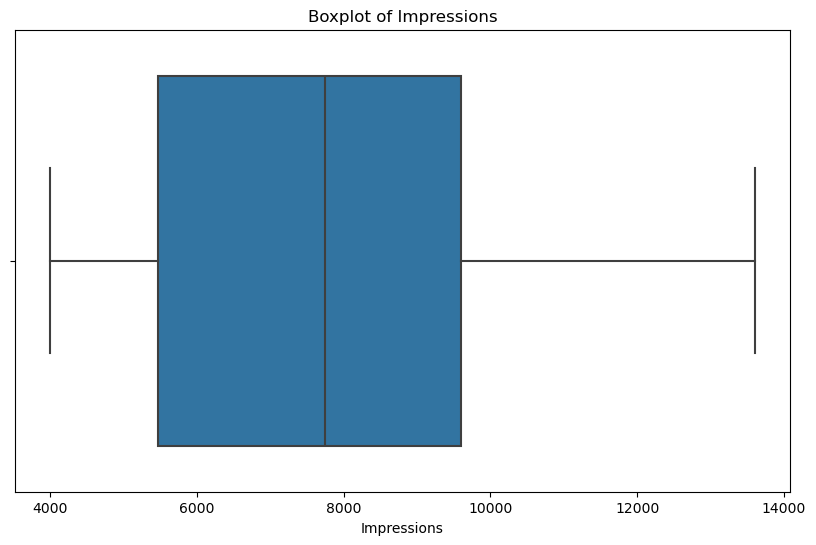

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


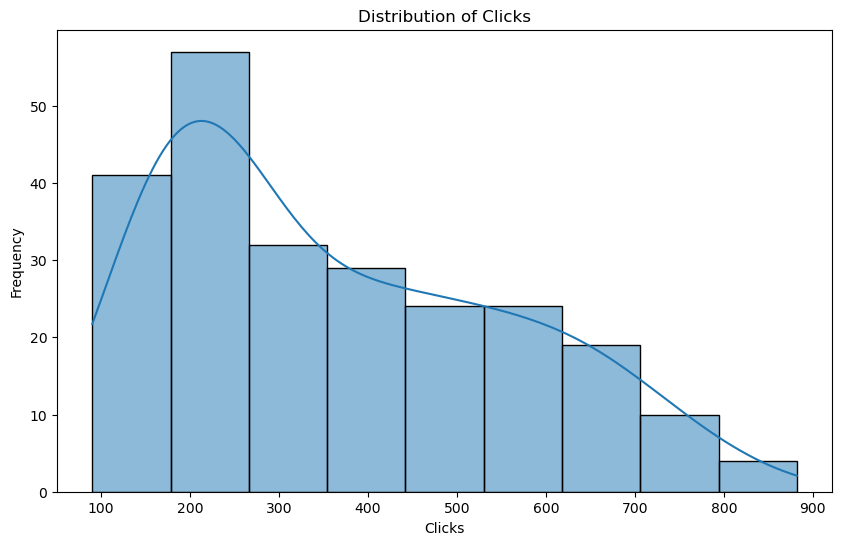

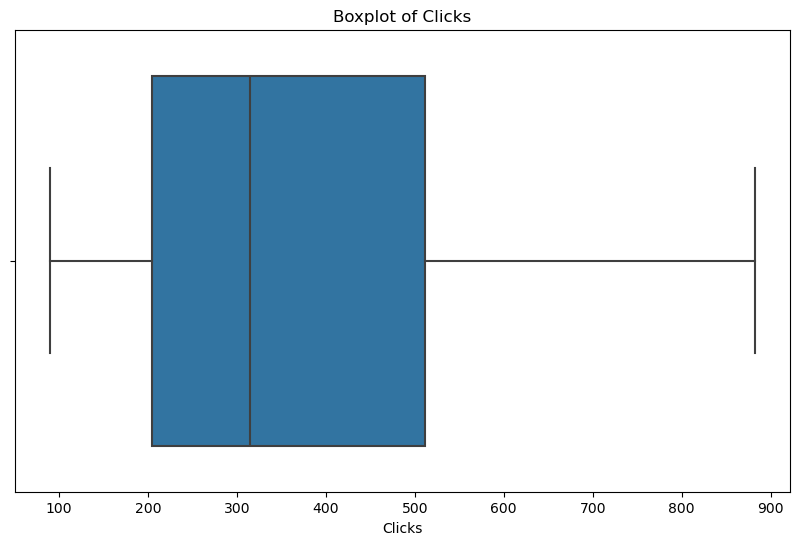

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


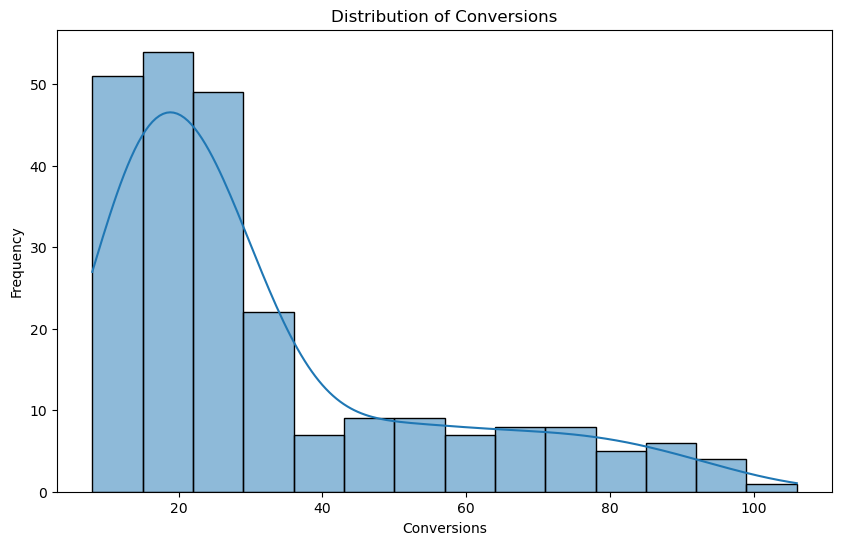

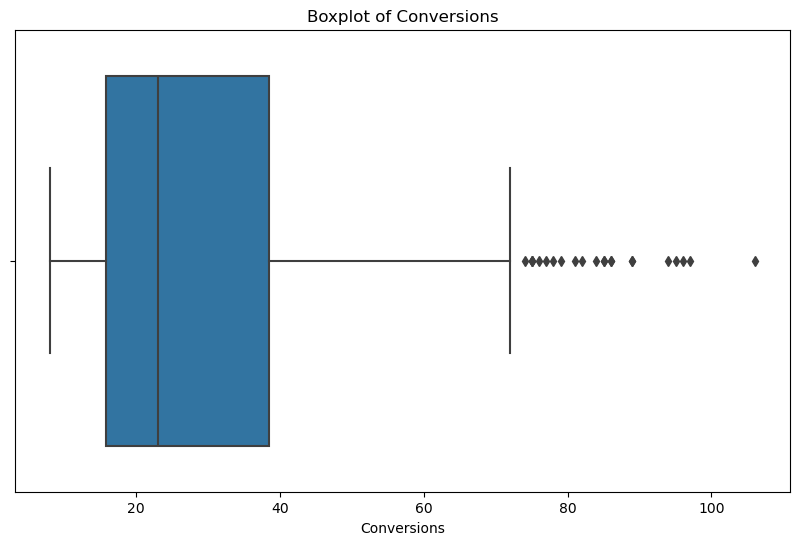

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


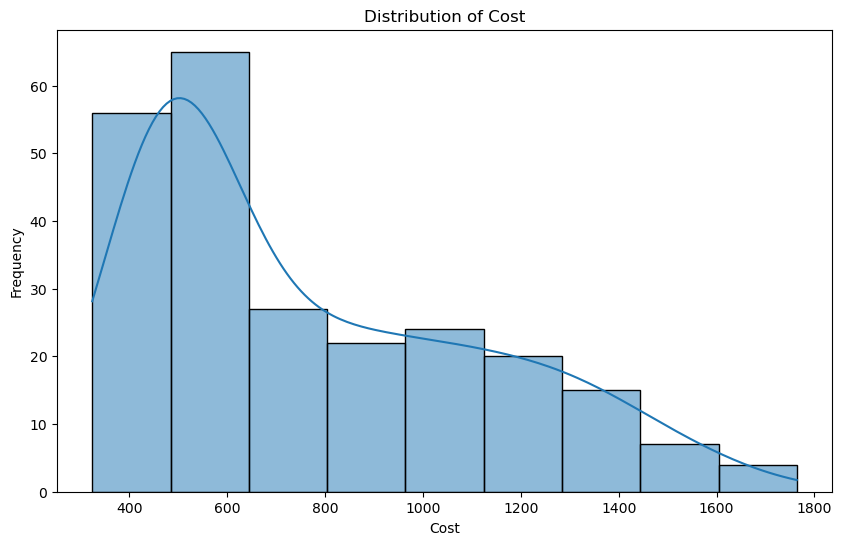

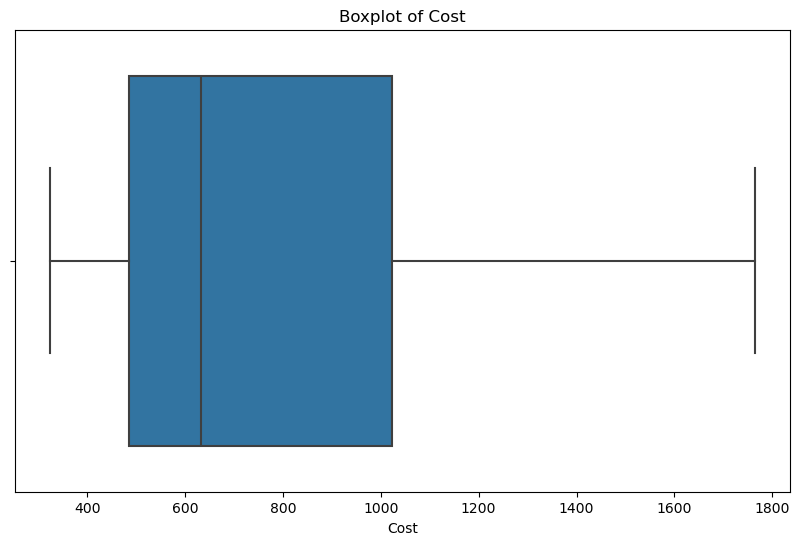

In [183]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms and boxplots for numerical variables
numerical_vars = ['Impressions', 'Clicks', 'Conversions', 'Cost']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()


### Interpretation of the histograms and boxplots for numerical variables
- The distribution of numerical variables mainly follows a right-skewed pattern (positive skew), characterized by:
    - The tail is longer on the right side.
    - The mean is greater than the median.
    - Conversions have many outliers that affect (see the boxplot for conversions)
- The standard deviation std is a significant fraction of the mean, especially in clicks, Conversions, and Cost, indicating high variability in the numerical dataset.

**Accordingly:**
- Rely on median and CQ for representing the central tendency in this data set. 
- 22 outliers have been identified and removed from Conversions.
- A subset of the data without the conversions outliers has been created to be used when needed (especially calculating the mean.) 

**Bar plots for categorical variables to see the distribution of campaigns across**

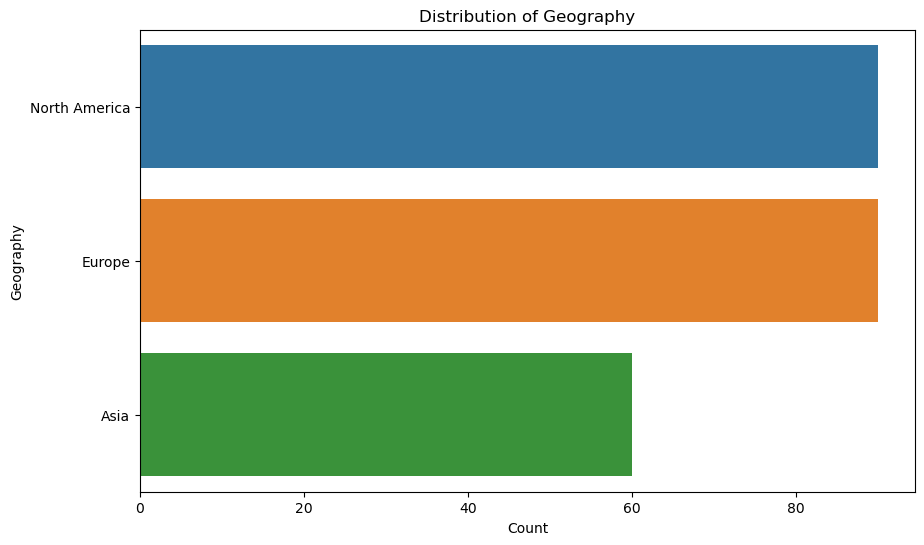

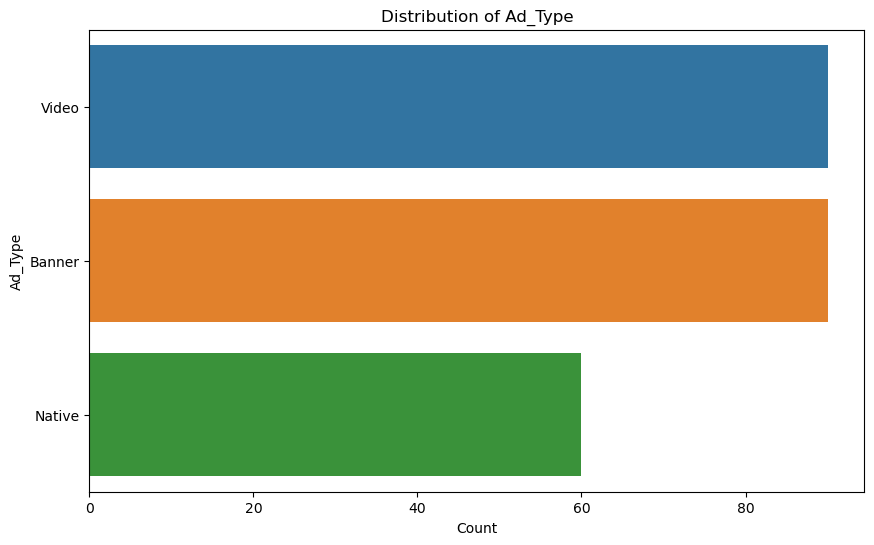

In [181]:

# Plot bar plots for categorical variables
categorical_vars = ['Geography', 'Ad_Type']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)
    plt.show()


> **Important:** When comparing the 'Geography' and 'Ad_type' categories, it's important to avoid using total numbers for comparisons because there are fewer campaigns in Asia (60 campaigns) and a lower number of Native ads (60) compared to the other categories..

**Identifying and removing outliers in Conversions**

In [118]:

# Identify outliers in Conversions field
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers from Conversions field
df_no_outliers = remove_outliers(df, 'Conversions')

# Display filtered DataFrame
print("DataFrame after removing outliers from Conversions field:")
df_no_outliers.shape


DataFrame after removing outliers from Conversions field:


(218, 11)

## Objective 1: Trends

### Global Conversion Rate CR and Click Through Rate CTR over time

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17816\1512550527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Month'] = df_no_outliers['DateTime'].dt.to_period('M')


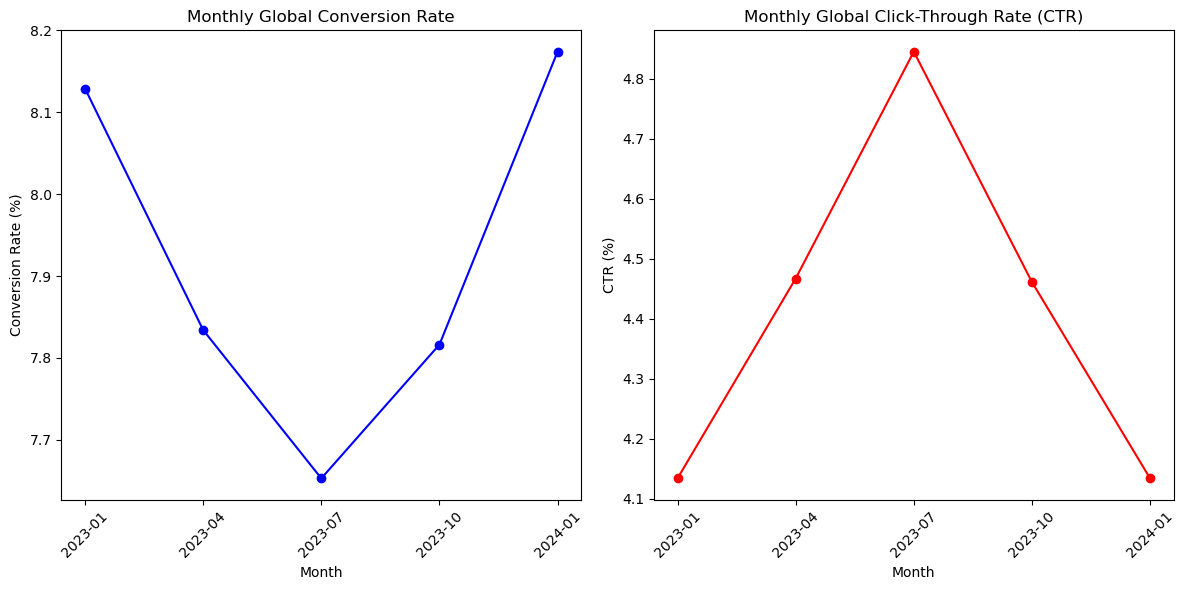

In [123]:

# Extract month from DateTime
df_no_outliers['Month'] = df_no_outliers['DateTime'].dt.to_period('M')

# Group by Month and calculate aggregated metrics
monthly_metrics = df_no_outliers.groupby('Month').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum'
}).reset_index()

# Calculate Conversion Rate and CTR
monthly_metrics['ConversionRate'] = (monthly_metrics['Conversions'] / monthly_metrics['Clicks']) * 100
monthly_metrics['CTR'] = (monthly_metrics['Clicks'] / monthly_metrics['Impressions']) * 100

# Plot Conversion Rate
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(monthly_metrics['Month'].astype(str), monthly_metrics['ConversionRate'], marker='o', linestyle='-', color='b')
plt.title('Monthly Global Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)

# Plot CTR
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(monthly_metrics['Month'].astype(str), monthly_metrics['CTR'], marker='o', linestyle='-', color='r')
plt.title('Monthly Global Click-Through Rate (CTR)')
plt.xlabel('Month')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Interpretation of the trends of Global CR & CTR 

- The conversion rate is the lowest on July 23 despite having the highest click-through rate (CTR) this month. This may require additional effort to optimize the conversion rate.

### Possible Conclusions and Hypotheses
1. **Misalignment with Target Audience** 
2. **User Experience (UX) Problems** 
3. **Offer or Call-to-Action (CTA)**
4. **External Facors:**
5. **Ad Copy and Cretive:**

### Reginal Conversion Rate CR and Click Through Rate CTR over time


**North America**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17816\168210207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['DateTime'].dt.to_period('M')


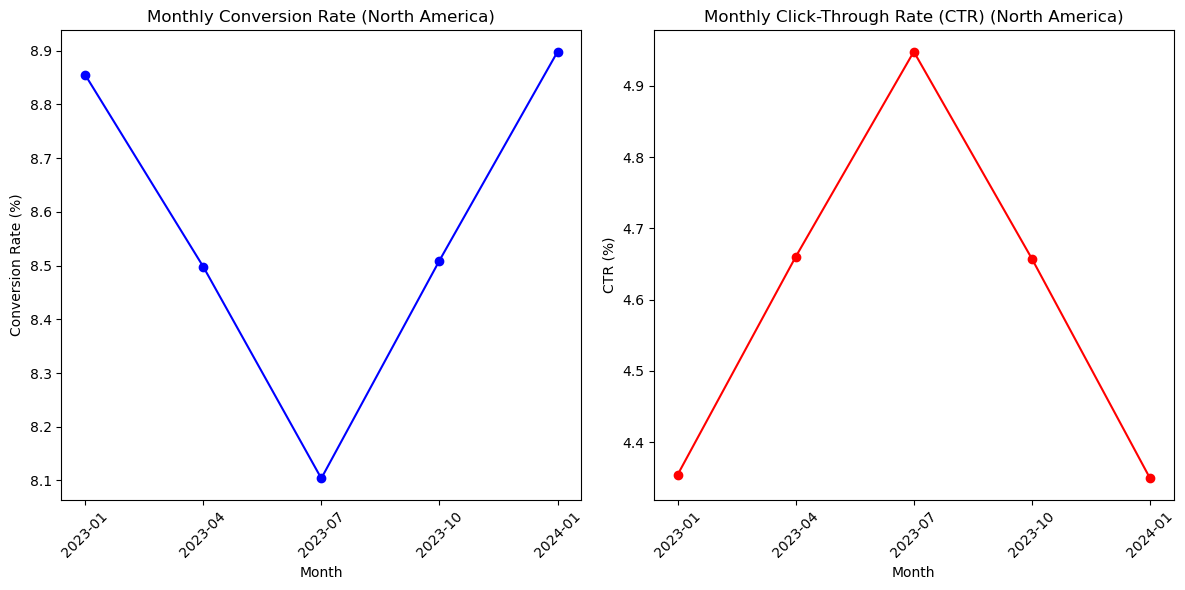

In [125]:

# Filter by Geography = North America
df_filtered = df_no_outliers[df_no_outliers['Geography'] == 'North America']

# Extract month from DateTime
df_filtered['Month'] = df_filtered['DateTime'].dt.to_period('M')

# Group by Month and calculate aggregated metrics
monthly_metrics = df_filtered.groupby('Month').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum'
}).reset_index()

# Calculate Conversion Rate and CTR
monthly_metrics['ConversionRate'] = (monthly_metrics['Conversions'] / monthly_metrics['Clicks']) * 100
monthly_metrics['CTR'] = (monthly_metrics['Clicks'] / monthly_metrics['Impressions']) * 100

# Plot Conversion Rate
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(monthly_metrics['Month'].astype(str), monthly_metrics['ConversionRate'], marker='o', linestyle='-', color='b')
plt.title('Monthly Conversion Rate (North America)')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)

# Plot CTR
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(monthly_metrics['Month'].astype(str), monthly_metrics['CTR'], marker='o', linestyle='-', color='r')
plt.title('Monthly Click-Through Rate (CTR) (North America)')
plt.xlabel('Month')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Europe**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17816\2849682638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['DateTime'].dt.to_period('M')


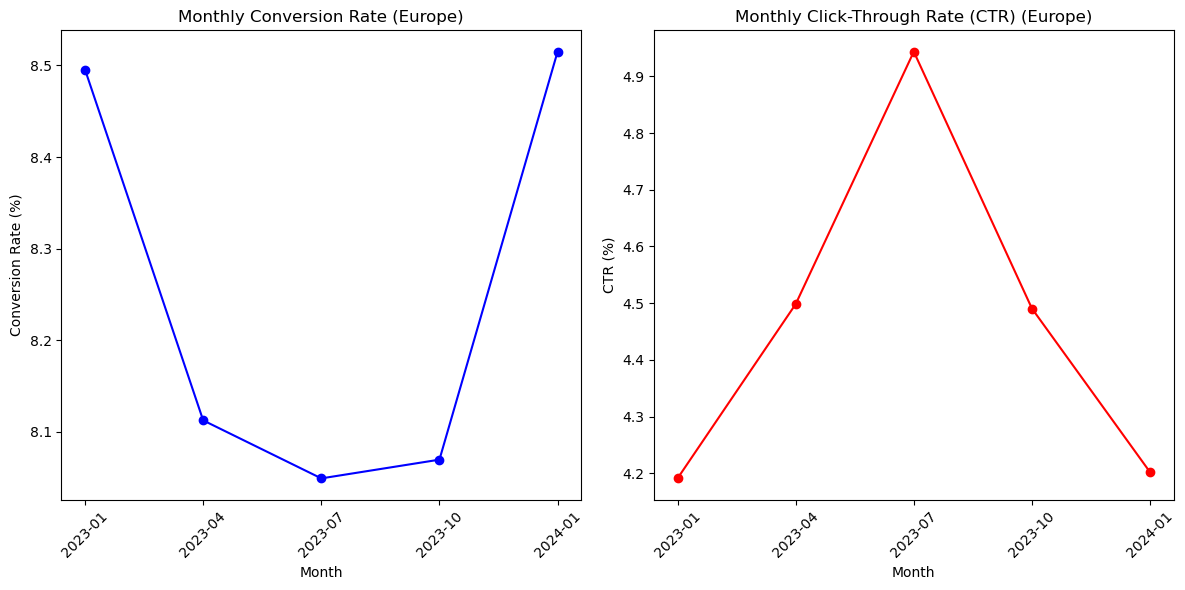

In [127]:

# Filter by Geography = North America
df_filtered = df_no_outliers[df_no_outliers['Geography'] == 'Europe']

# Extract month from DateTime
df_filtered['Month'] = df_filtered['DateTime'].dt.to_period('M')

# Group by Month and calculate aggregated metrics
monthly_metrics = df_filtered.groupby('Month').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum'
}).reset_index()

# Calculate Conversion Rate and CTR
monthly_metrics['ConversionRate'] = (monthly_metrics['Conversions'] / monthly_metrics['Clicks']) * 100
monthly_metrics['CTR'] = (monthly_metrics['Clicks'] / monthly_metrics['Impressions']) * 100

# Plot Conversion Rate
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(monthly_metrics['Month'].astype(str), monthly_metrics['ConversionRate'], marker='o', linestyle='-', color='b')
plt.title('Monthly Conversion Rate (Europe)')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)

# Plot CTR
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(monthly_metrics['Month'].astype(str), monthly_metrics['CTR'], marker='o', linestyle='-', color='r')
plt.title('Monthly Click-Through Rate (CTR) (Europe)')
plt.xlabel('Month')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Asia**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17816\2125242135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['DateTime'].dt.to_period('M')


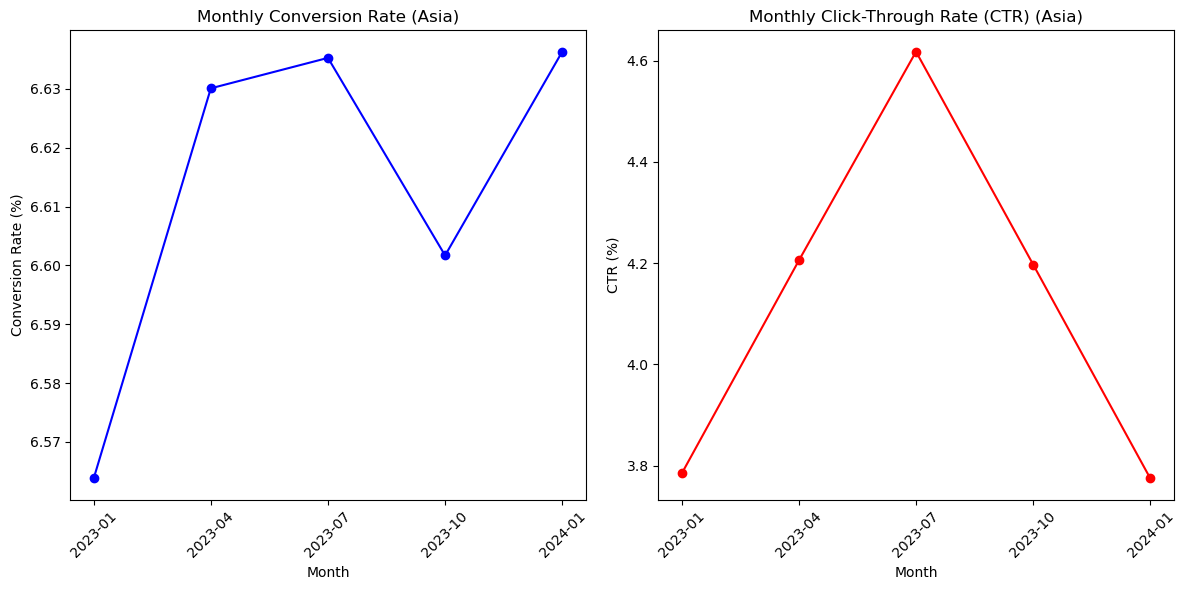

In [129]:

# Filter by Geography = North America
df_filtered = df_no_outliers[df_no_outliers['Geography'] == 'Asia']

# Extract month from DateTime
df_filtered['Month'] = df_filtered['DateTime'].dt.to_period('M')

# Group by Month and calculate aggregated metrics
monthly_metrics = df_filtered.groupby('Month').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum'
}).reset_index()

# Calculate Conversion Rate and CTR
monthly_metrics['ConversionRate'] = (monthly_metrics['Conversions'] / monthly_metrics['Clicks']) * 100
monthly_metrics['CTR'] = (monthly_metrics['Clicks'] / monthly_metrics['Impressions']) * 100

# Plot Conversion Rate
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(monthly_metrics['Month'].astype(str), monthly_metrics['ConversionRate'], marker='o', linestyle='-', color='b')
plt.title('Monthly Conversion Rate (Asia)')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)

# Plot CTR
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(monthly_metrics['Month'].astype(str), monthly_metrics['CTR'], marker='o', linestyle='-', color='r')
plt.title('Monthly Click-Through Rate (CTR) (Asia)')
plt.xlabel('Month')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Intrepretation of the trends of reginal metrics of CR & CTR 

- The same global phenomena of **lowest CR and highest CTR** was in **July-23** across **North America** and **Europe** with Asia as an exception, as the highest CR and CTR together was in July-23.

**Possible conclusion and hypothesis:**
- **Target Audience Differences**
- **Cultural and Behavioral Factors**
- **Market Maturity and Competition**
- **Economic Factors**

### The Global trends of Impressions, clicks, conversions, cost

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17816\509976412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Month'] = df_no_outliers['DateTime'].dt.to_period('M')


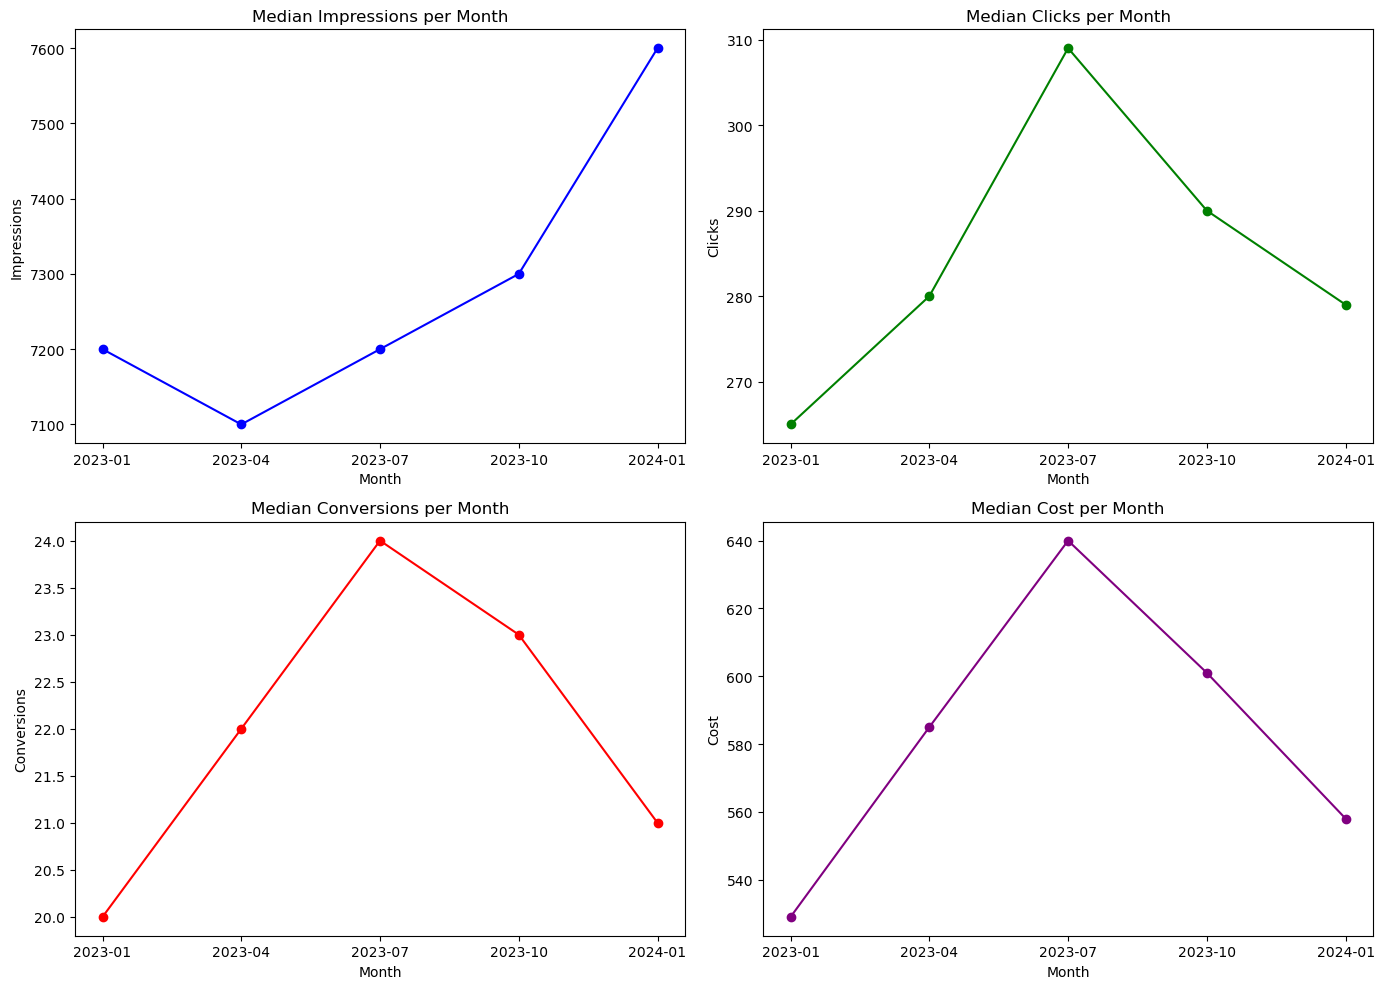

In [192]:

# Extract month from DateTime
df_no_outliers['Month'] = df_no_outliers['DateTime'].dt.to_period('M')

# Group by Month and calculate median metrics
monthly_medians = df_no_outliers.groupby('Month').agg({
    'Impressions': 'median',
    'Clicks': 'median',
    'Conversions': 'median',
    'Cost': 'median'
}).reset_index()

# Convert 'Month' to string for plotting
monthly_medians['Month'] = monthly_medians['Month'].astype(str)

# Plotting each metric in separate subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Impressions
axes[0, 0].plot(monthly_medians['Month'], monthly_medians['Impressions'], marker='o', color='blue')
axes[0, 0].set_title('Median Impressions per Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Impressions')

# Plot 2: Clicks
axes[0, 1].plot(monthly_medians['Month'], monthly_medians['Clicks'], marker='o', color='green')
axes[0, 1].set_title('Median Clicks per Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Clicks')

# Plot 3: Conversions
axes[1, 0].plot(monthly_medians['Month'], monthly_medians['Conversions'], marker='o', color='red')
axes[1, 0].set_title('Median Conversions per Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Conversions')

# Plot 4: Cost
axes[1, 1].plot(monthly_medians['Month'], monthly_medians['Cost'], marker='o', color='purple')
axes[1, 1].set_title('Median Cost per Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Cost')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### The interpretation of global trends of Impressions, clicks, conversions, cost 

- Highest Impression median was in Jan-23
- Highest clicks, conversions and cost were in July-23

**Conclusion and Hypothesis**
- **High Awareness in January 2023**
- **Increased Engagement and Spending in July 2023**


## Objective 1: Correlation

  - Scatter plots and correlation matrices for numerical variables to identify potential relationships.
  - Boxplots to compare the performance metrics (Impression, Clicks, Conversions, Cost) across different geographies and ad types


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

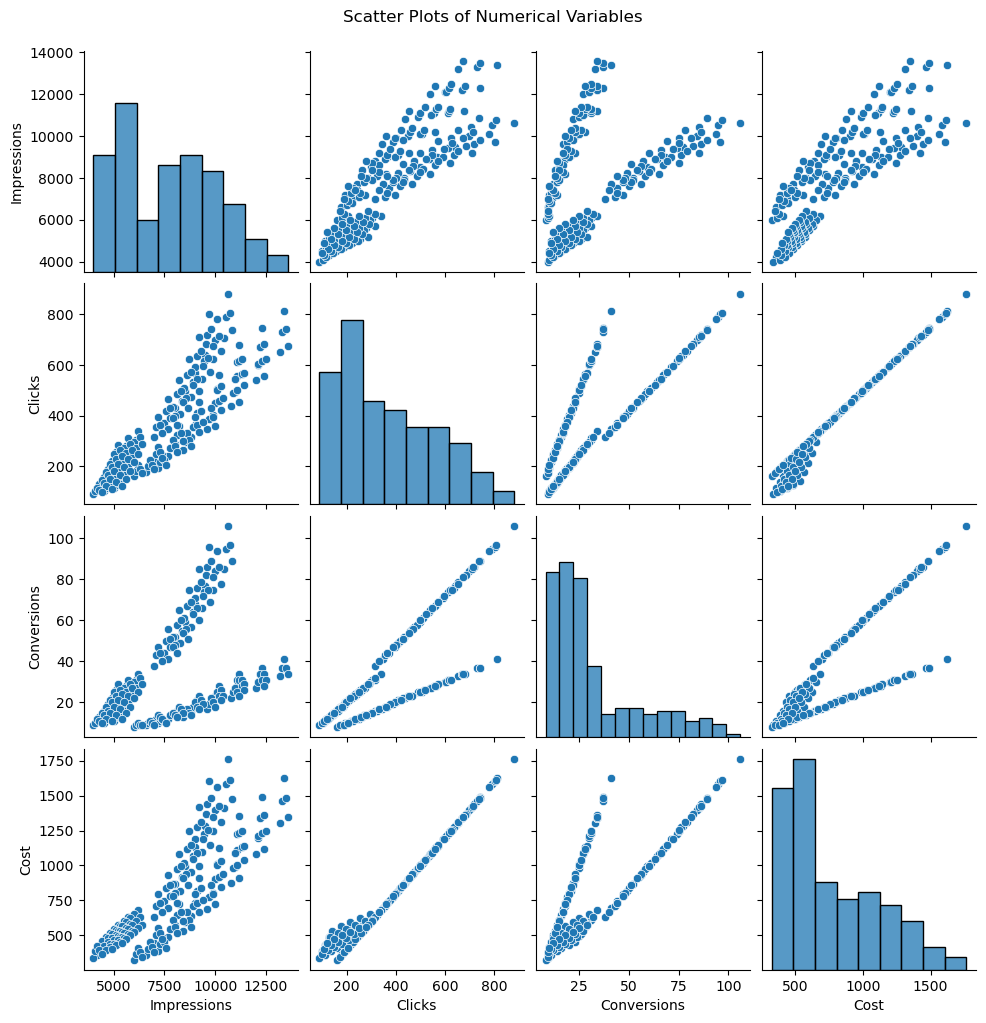

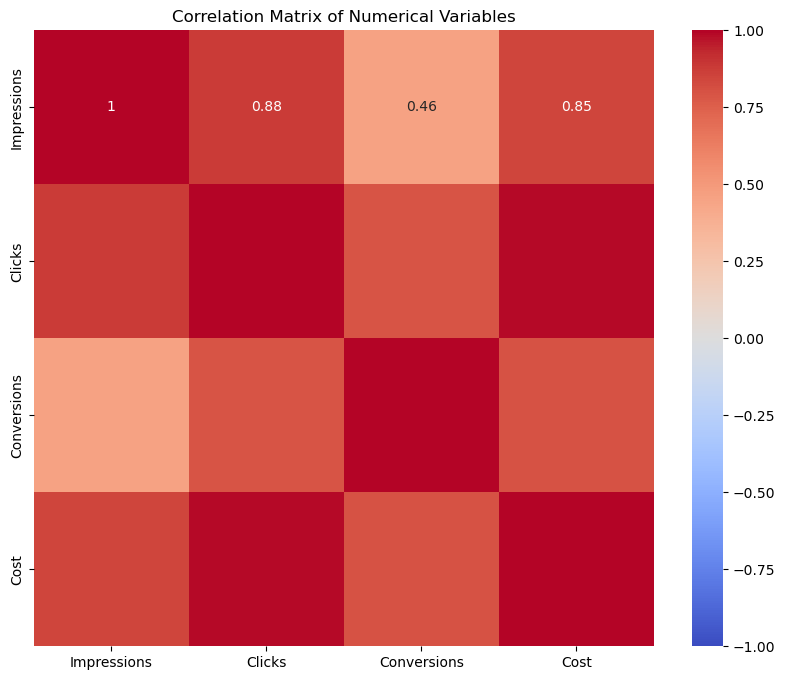

In [133]:
# Step 2: Scatter plots for numerical variables
numerical_vars = ['Impressions', 'Clicks', 'Conversions', 'Cost']
sns.pairplot(df[numerical_vars])
plt.suptitle('Scatter Plots of Numerical Variables', y=1.02)
plt.show()

# Step 3: Correlation matrix for numerical variables
corr_matrix = df[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### Interpretation of Correlation:

A positive correlation between impressions and both cost and clicks suggests that as the number of impressions increases, both the cost and the number of clicks also tend to increase. This relationship can be utilized in several strategic ways to optimize your marketing efforts and improve campaign performance. Here are some actions you can take:

### 1. **Optimize Budget Allocation**

**Strategy:**
- **Allocate Budget Based on Impressions:** Since impressions correlate positively with clicks and cost, allocate more budget to campaigns or channels that have historically shown high impressions. This can drive higher engagement and potentially more conversions.
- **Monitor Cost Efficiency:** Keep an eye on the cost per impression and cost per click. Ensure that increased spending is justified by the returns in terms of clicks and, ultimately, conversions.

**Implementation:**
- **Historical Data Analysis:** Use historical data to identify which campaigns or channels yield the highest impressions and allocate more budget to these areas.
- **Performance Tracking:** Continuously monitor the performance to ensure that increased spending leads to proportional increases in clicks and conversions.

### 2. **Improve Ad Targeting and Creative**

**Strategy:**
- **Refine Targeting:** Improve your targeting criteria to ensure that the increased impressions are reaching the most relevant audience. Higher relevance can lead to higher click-through rates (CTR) and better conversion rates.
- **Enhance Ad Creative:** Create compelling ad creatives that can capitalize on the increased number of impressions. A more engaging ad can lead to higher CTR and better engagement.

**Implementation:**
- **Audience Segmentation:** Use data to segment your audience and tailor your ads to different segments to improve relevance and engagement.
- **A/B Testing:** Continuously test different ad creatives to see which ones perform best in terms of generating clickement and better conversion rates from your campaigns.l methods or software tools tailored to your specific scenario.

## Objective 2: Formulate and test hypotheses related to campaign optimization.

**Formulate Hypotheses**

**Hypothesis 1:** Different Ad_Types have significantly different CTRs.

- Null Hypothesis (H0): The mean CTR is the same across all Ad_Types.
- Alternative Hypothesis (H1): The mean CTR varies significantly across different Ad_Types.

### Calculating and Ploting the difference in CTR accross Ad_Types

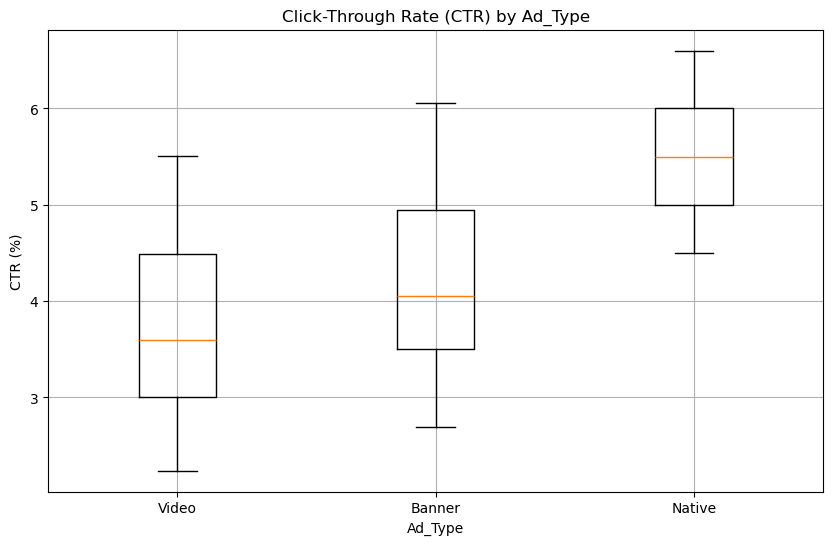

In [149]:

import matplotlib.pyplot as plt

# Boxplot of CTR by Ad_Type
plt.figure(figsize=(10, 6))
plt.boxplot([df_no_outliers[df_no_outliers['Ad_Type'] == ad_type]['CTR'] for ad_type in df_no_outliers['Ad_Type'].unique()],
            labels=df_no_outliers['Ad_Type'].unique())
plt.xlabel('Ad_Type')
plt.ylabel('CTR (%)')
plt.title('Click-Through Rate (CTR) by Ad_Type')
plt.grid(True)
plt.show()

**Interpretation** 

The mean CTR varies across different Ad_Types. However, we have to check if the results are statistically significant or if the results might be by chance. 

In [170]:

# Checking significance 

import pandas as pd

# Assuming df_no_outliers already contains necessary columns: Impressions, Clicks, Ad_Type

# Calculate CTR
df_no_outliers['CTR'] = (df_no_outliers['Clicks'] / df_no_outliers['Impressions']) * 100

# Group by Ad_Type and calculate mean CTR
ctr_by_ad_type = df_no_outliers.groupby('Ad_Type')['CTR'].mean().reset_index()

from scipy.stats import f_oneway

# Example ANOVA test for hypothesis 1
ad_type_groups = [df_no_outliers[df_no_outliers['Ad_Type'] == ad_type]['CTR'] for ad_type in df_no_outliers['Ad_Type'].unique()]
f_statistic, p_value = f_oneway(*ad_type_groups)

if p_value < 0.05:
    print("Reject H0: There is significant evidence that mean CTR differs between Ad_Types.")
else:
    print("Fail to reject H0: There is no significant evidence that mean CTR differs between Ad_Types.")


Reject H0: There is significant evidence that mean CTR differs between Ad_Types.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17816\1491583573.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['CTR'] = (df_no_outliers['Clicks'] / df_no_outliers['Impressions']) * 100


**Hypothesis 2:** CTRs differ significantly between Geographies.

- Null Hypothesis (H0): The mean CTR is the same across all Geographies.
- Alternative Hypothesis (H1): The mean CTR varies significantly across different Geographies.

### Calculating and Ploting the difference in CTR accross Geography

In [173]:

# Calculate Conversion Rate 
df_no_outliers['Conversion_Rate'] = (df_no_outliers['Conversions'] / df_no_outliers['Clicks']) * 100

# Group by Geography and calculate mean Conversion Rate and CTR
conversion_ctr_by_geo = df_no_outliers.groupby('Geography').agg({
    'Conversion_Rate': 'mean',
   
}).reset_index()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17816\1050992865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Conversion_Rate'] = (df_no_outliers['Conversions'] / df_no_outliers['Clicks']) * 100


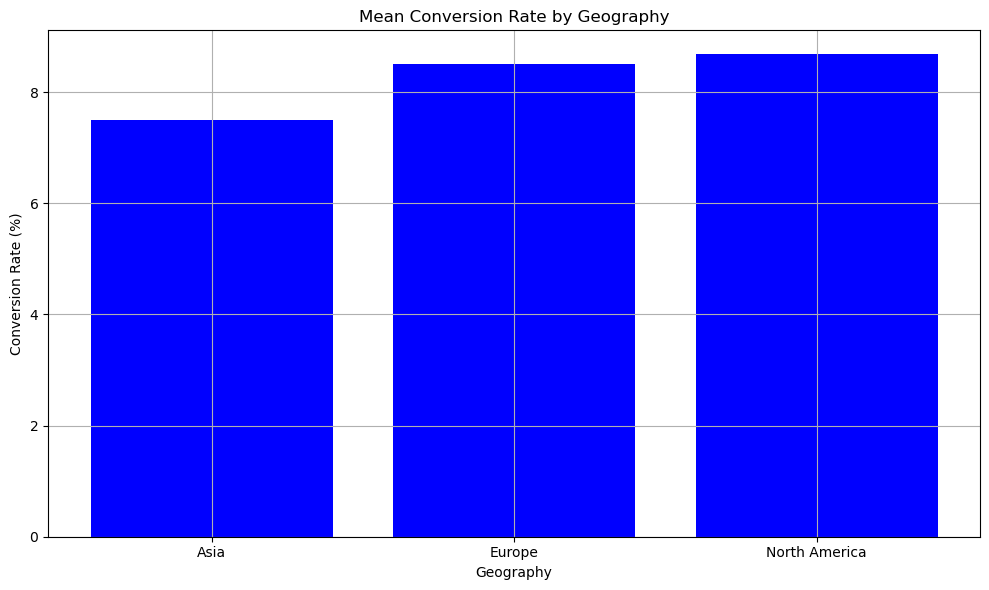

In [175]:

import matplotlib.pyplot as plt

# Bar plot of Conversion Rate by Geography
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Conversion Rate
ax.bar(conversion_ctr_by_geo['Geography'], conversion_ctr_by_geo['Conversion_Rate'], color='blue')
ax.set_title('Mean Conversion Rate by Geography')
ax.set_xlabel('Geography')
ax.set_ylabel('Conversion Rate (%)')
ax.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Interpretation** 

The mean CR varies across different Regions. However, we have to check if the results are statistically significant or if the results might be by chance. 

In [146]:

from scipy.stats import f_oneway

# Example ANOVA test for Hypothesis 1 (Conversion Rate)
geo_groups_conversion = [df_no_outliers[df_no_outliers['Geography'] == geo]['Conversion_Rate'] for geo in df_no_outliers['Geography'].unique()]
f_statistic, p_value = f_oneway(*geo_groups_conversion)

if p_value < 0.05:
    print("Reject H0: There is significant evidence that mean Conversion Rate differs between Geographies.")
else:
    print("Fail to reject H0: There is no significant evidence that mean Conversion Rate differs between Geographies.")

Reject H0: There is significant evidence that mean Conversion Rate differs between Geographies.


# Case Study 2
## ContextOur department regularly conducts in-depth analyses to answer key business
questions and to stay ahead of industry trends. For this case study, you may use
the same dataset.n KPIs.

## Objectives
1. Ad-Hoc Analysis:
    
- Conduct an ad-hoc analysis to answer the following business questions    

	- Which geographical regions are performing best in terms of conversion ra t    es?
	- What time of day/week do campaigns perform best in terms of CPC and     CTR?
	- Which ad types are most effective in driving conversi    ons? 
- Identify any additional patterns or insights that could inform our media buying strategies.

2. Strategic Recommenda    tions: 

- Based on your analysis, provide strategic recommendations for optimising our media buying     efforts. 
- Suggest any changes in the current analytics processes and strategies that could improve our campaign performance.paign performance.

## Deliverables
 1. Ad-hoc analysis (Using SQL)
 2. Strategic recommendations 
 

## Analysis

**Question 1**: Which geographical regions are performing best in terms of conversion rates?

This query does the following:

1. Selects the region.
2. Sums up the Conversions and Clicks for each region.
3. Calculates the conversion rate as the ratio of total conversions to total clicks, multiplied by 100 to get a percentage.
4. Groups the results by region.
5. Orders the results by the conversion rate in descending order so that the best performing regions are at the top.


```sql

SELECT 
    Geography,
    SUM(Conversions) AS TotalConversions,
    SUM(Clicks) AS TotalClicks,
    (SUM(Conversions) * 100.0 / SUM(Clicks)) AS ConversionRate
FROM 
    campaigns_data
GROUP BY 
    Geography
ORDER BY 
    ConversionRate DESC;

```

**Results**

| Geography	    | TotalConversions 	| TotalClicks  | ConversionRate |
| ------------- | ----------------- | ------------ | ---------------|
| Europe	    |    3282	        |   35541	   |     9.23441    |
| North America |	 2986	        |   32343	   |     9.23229    |
| Asia	        |    1315	        |   19880	   |     6.61469    |

The results looks different after **removing the outlliers from Conversions** , as shown below:  


```sql

WITH Clicks_Ranked AS (
    SELECT Clicks, 
           ROW_NUMBER() OVER (ORDER BY Clicks) AS rn,
           COUNT(*) OVER () AS total_rows
    FROM campaigns_data
),
Clicks_Quartiles AS (
    SELECT 
        MAX(CASE WHEN rn = FLOOR(total_rows * 0.25) THEN Clicks END) AS Clicks_Q1,
        MAX(CASE WHEN rn = FLOOR(total_rows * 0.75) THEN Clicks END) AS Clicks_Q3
    FROM Clicks_Ranked
),
Conversions_Ranked AS (
    SELECT Conversions, 
           ROW_NUMBER() OVER (ORDER BY Conversions) AS rn,
           COUNT(*) OVER () AS total_rows
    FROM campaigns_data
),
Conversions_Quartiles AS (
    SELECT 
        MAX(CASE WHEN rn = FLOOR(total_rows * 0.25) THEN Conversions END) AS Conversions_Q1,
        MAX(CASE WHEN rn = FLOOR(total_rows * 0.75) THEN Conversions END) AS Conversions_Q3
    FROM Conversions_Ranked
),
IQR_Calculations AS (
    SELECT
        cq.Clicks_Q1,
        cq.Clicks_Q3,
        (cq.Clicks_Q3 - cq.Clicks_Q1) AS Clicks_IQR,
        (cq.Clicks_Q1 - 1.5 * (cq.Clicks_Q3 - cq.Clicks_Q1)) AS Clicks_Lower_Bound,
        (cq.Clicks_Q3 + 1.5 * (cq.Clicks_Q3 - cq.Clicks_Q1)) AS Clicks_Upper_Bound,
        crq.Conversions_Q1,
        crq.Conversions_Q3,
        (crq.Conversions_Q3 - crq.Conversions_Q1) AS Conversions_IQR,
        (crq.Conversions_Q1 - 1.5 * (crq.Conversions_Q3 - crq.Conversions_Q1)) AS Conversions_Lower_Bound,
        (crq.Conversions_Q3 + 1.5 * (crq.Conversions_Q3 - crq.Conversions_Q1)) AS Conversions_Upper_Bound
    FROM
        Clicks_Quartiles cq, Conversions_Quartiles crq
),
Filtered_Data AS (
    SELECT
        cd.*
    FROM
        campaigns_data cd,
        IQR_Calculations iqr
    WHERE
        cd.Clicks BETWEEN iqr.Clicks_Lower_Bound AND iqr.Clicks_Upper_Bound
        AND cd.Conversions BETWEEN iqr.Conversions_Lower_Bound AND iqr.Conversions_Upper_Bound
)
-- Step 4: Calculate Conversion Rate per Geography
SELECT 
    Geography,
    SUM(Conversions) AS TotalConversions,
    SUM(Clicks) AS TotalClicks,
    (SUM(Conversions) * 100.0 / SUM(Clicks)) AS ConversionRate
FROM 
    Filtered_Data
GROUP BY 
    Geography
ORDER BY 
    ConversionRate DESC;

```

**The results after removing the outliers from conversions**

| Geography	     | TotalConversions |	TotalClicks |	ConversionRate |
| -------------- | ---------------- | ------------- | ---------------- |
| North America  |	2242	        |      26141    |     8.57657      |
| Europe	     |  2162	        |      26220	|     8.24561      |
| Asia	         |  1315	        |      19880	|     6.61469      |

**Answre 1**: As we can see that the **North America** perform better in term of conversion rate, followed by Europe then Asia.

**Question 2**: What time of day/week do campaigns perform best in terms of CPC and CTR?

### Explanation:
1. **DATE(Date) AS Campaign_Date** : Extracts the date from the `Date` column.
2. **DAYNAME(Date) AS DayOfWeek** : Extracts the name of the day of the week from the `Date` column.
3. **Hour**: Groups by each hour of the day.
4. **SUM(Clicks), SUM(Impressions), SUM(Cost)**: Sums up the clicks, impressions, and cost for each group.
5. **CPC Calculation**: `SUM(Cost) / SUM(Clicks)` calculates the average CPC.
6. **CTR Calculation**: `(SUM(Clicks) / SUM(Impressions)) * 100` calculates the CTR as a percentage.
7. **GROUP BY Campaign_Date, DayOfWeek, Hour**: Aggregates the data by the date, day of the week, and hour.
8. **ORDER BY CPC ASC, CTR DESC**: Orders the results by the lowest CPC and highest CTR.
9. **LIMIT 10**: Limits the result set to the top 10 records.

This query will provide you with the top 10 time periods in terms of campaign performance based on the criteria of CPC and CTR.

**Note**: The query have been adjusted to show CPC and CTR in two different tables for the purpose of ordering the results for one critera at a time.


```sql 
SELECT 
    DATE(date) AS Campaign_Date,
    DAYNAME(date) AS DayOfWeek,
    hour,
    SUM(clicks) AS Total_Clicks,
    SUM(impressions) AS Total_Impressions,
    SUM(cost) AS Total_Cost,
    (SUM(cost) / SUM(clicks)) AS CPC
    --(SUM(clicks) / SUM(impressions)) * 100 AS CTR
FROM 
    campaigns_data
GROUP BY 
    hour, Campaign_Date, DayOfWeek
ORDER BY 
    CPC ASC 
    -- CTR desc
LIMIT 10;
```

Showing the **results for CPC**

| Campaign_Date| DayOfWeek |   hour     |  Total_Clicks | Total_Impressions | Total_Cost | CPC      |
| ------------ | --------- | ---------- | ------------- | ----------------- | ---------- | ---      |
|2023-01-01	   | Sunday	   | 07:00:00	| 221	        | 7000	            | 441.00     | 1.995475 |
|2023-01-01	   | Sunday    | 18:00:00	| 248	        | 5500	            | 495.00	 | 1.995968 |
|2023-01-02	   | Monday	   | 19:00:00	| 265	        | 8400	            | 529.00	 | 1.996226 |
|2023-01-02	   | Monday    | 20:00:00	| 346	        | 9600	            | 691.00	 | 1.997110 |
|2023-01-02	   | Monday    | 06:00:00	| 347	        | 7700	            | 693.00	 | 1.997118 |
|2023-01-01	   | Sunday    | 09:00:00	| 365	        | 9000	            | 729.00	 | 1.997260 |
|2023-01-01	   | Sunday    | 11:00:00	| 545	        | 11000	            | 1089.00	 | 1.998165 |
|2023-01-02	   | Monday    | 10:00:00	| 624	        | 9900	            | 1247.00	 | 1.998397 |
|2023-01-01	   | Sunday	   | 14:00:00	| 432	        | 8000	            | 864.00	 | 2.000000 |
|2023-01-01	   | Sunday    | 06:00:00	| 162	        | 6000	            | 324.00	 | 2.000000 |

**Sunday 7:00** has the cheapst rate for clicks.

Showing the **results of top 10 CTR based on Time**

| Campaign_Date | DayOfWeek | hour    | Total_Clicks | Total_Impressions | Total_Cost | CTR    |
|---------------|-----------|---------|--------------|-------------------|------------|--------|
| 2023-07-02    | Sunday    | 11:00   | 882          | 10650             | 1764.00    | 8.2817 |
| 2023-07-01    | Saturday  | 17:00   | 803          | 9700              | 1606.00    | 8.2784 |
| 2023-07-02    | Sunday    | 10:00   | 780          | 10100             | 1560.00    | 7.7228 |
| 2023-07-01    | Saturday  | 16:00   | 710          | 9200              | 1420.00    | 7.7174 |
| 2023-10-01    | Sunday    | 17:00   | 741          | 9800              | 1482.00    | 7.5612 |
| 2023-04-01    | Saturday  | 17:00   | 720          | 9600              | 1440.00    | 7.5000 |
| 2023-10-02    | Monday    | 11:00   | 806          | 10750             | 1612.00    | 7.4977 |
| 2023-04-02    | Sunday    | 11:00   | 791          | 10550             | 1582.00    | 7.4976 |
| 2023-07-02    | Sunday    | 09:00   | 684          | 9550              | 1368.00    | 7.1623 |
| 2023-07-01    | Saturday  | 15:00   | 622          | 8700              | 1244.00    | 7.1494 |


### Answer Q2
**Tuesday 17:00** has the best CTR. 

### Question 3: Which ad types are most effective in driving conversions?

**Explanation of the SQL Query:**

1. **SELECT Clause**:
   - `ad_type`: Selects the `ad_type` column from the `campaigns_data` table.
   - `SUM(conversions) AS TotalConversions`: Calculates the total number of conversions for each `ad_type` and aliases the result as `TotalConversions`.
   - `SUM(clicks) AS TotalClicks`: Calculates the total number of clicks for each `ad_type` and aliases the result as `TotalClicks`.
   - `SUM(impressions) AS TotalImpressions`: Calculates the total number of impressions for each `ad_type` and aliases the result as `TotalImpressions`.
   - `(SUM(conversions) / SUM(clicks)) * 100 AS ConversionRate_Clicks`: Calculates the conversion rate based on clicks for each `ad_type` by dividing total conversions by total clicks, then multiplies by 100 to get a percentage. This is aliased as `ConversionRate_Clicks`.

2. **FROM Clause**:
   - `campaigns_data`: Specifies the table from which to retrieve data (`campaigns_data`).

3. **GROUP BY Clause**:
   - `ad_type`: Groups the results by the `ad_type` column. This ensures that the calculations (SUM and AVG) are done for each unique `ad_type`.

4. **ORDER BY Clause**:
   - `ConversionRate_Clicks DESC`: Orders the results by `ConversionRate_Clicks` in descending order. This means that ad types with higher conversion rates per click will appear first.

### Output:
- The output of this query will be a table showing each `ad_type` along with:
  - `TotalConversions`: Total number of conversions generated by the ad type.
  - `TotalClicks`: Total number of clicks received by the ad type.
  - `TotalImpressions`: Total number of impressions received by the ad type.
  - `ConversionRate_Clicks`: Conversion rate based on clicks for the ad type (percentage).

In [ ]:

```sql
SELECT
    ad_type,
    SUM(Conversions) AS TotalConversions,
    SUM(Clicks) AS TotalClicks,
    SUM(Impressions) AS TotalImpressions,
    (SUM(Conversions) / SUM(Clicks)) * 100 AS ConversionRate_Clicks,
    (SUM(Conversions) / SUM(Impressions)) * 100 AS ConversionRate_Impressions
FROM
    campaigns_data
GROUP BY
    ad_type
ORDER BY
    ConversionRate_Clicks DESC, ConversionRate_Impressions DESC;

```

| ad_type | TotalConversions | TotalClicks | TotalImpressions | ConversionRate_Clicks | ConversionRate_Impressions |
|---------|------------------|-------------|------------------|-----------------------|----------------------------|
| Native  | 3968             | 33067       | 531750           | 11.9999               | 0.7462                     |
| Video   | 1749             | 17449       | 468000           | 10.0235               | 0.3737                     |
| Banner  | 1866             | 37248       | 859500           | 5.0097                | 0.2171                     |


### Answer Q3
The **Native Ad Type performs best globally**.

## Objective 2 (Strategic Recommendations):
- Based on your analysis, provide strategic recommendations for optimizing our media buying efforts.
- Suggest any changes in the current analytics processes or strategies that could improve our campaign performance.

### Strategic Recommendations for Optimizing the Media Buying Efforts

- **Focus on the majority**: Since most campaigns have low conversion rates, there's potential to improve overall conversion rates by focusing on the majority. Understanding why the majority doesn't convert can be crucial.
- **Outliers might require separate analysis**: The high conversion rates on the right tail of the distribution might be outliers or represent a specific user segment with unique characteristics. Analyzing them separately could provide valuable insights.
- **Long tail impact**: Depending on your business model, the high converters in the long tail might contribute significantly to your total conversions. Understanding how to acquire more users with similar characteristics could be beneficial.
- **Optimize the user journey for the majority**: Analyze common drop-off points or friction points in the user journey for the majority of users who don't convert. Address these issues to improve overall conversion rates.
-	**Analyze Traffic Sources:**
Examine where the high CTR traffic came from. Identify if certain sources or demographics had lower conversion rates.
- **Targeted campaigns**: Consider segmenting your audience and creating targeted campaigns for user groups with lower conversion rates. This allows for tailored messaging and experiences that might resonate better with specific segments.
- **A/B testing different elements**: A/B test elements like call-to-action buttons, landing page layouts, or ad copy to see if variations improve conversion rates for the majority segment.
- **Consider cost-effectiveness**: While high converters are valuable, analyze the cost of acquiring them compared to the potential gain. Ensure your efforts are cost-effective in the long run.
- **Seasonal Trends**: Analyze if there are seasonal variations in conversion rates, CPC, or CTR. Adjust campaign timing and content based on these insights.
-	**Device Performance**: Evaluate how campaigns perform on different devices (desktop, mobile, tablet). Optimize landing pages and ad formats accordingly.
-	**Audience Segmentation**: Segment data by demographic factors (age, gender, income) or behavioral patterns (new vs. returning users). Tailor campaigns to target specific audience segments more effectively.
-	**Competitive Analysis**: Compare your campaign performance metrics with competitors or industry benchmarks. Identify opportunities to gain competitive advantage in specific areas.
- **Evaluate the Landing Page:**
Perform a usability test and analyze the landing page for potential issues. Check for any broken links, loading speed, or design problems.
- **Review Ad Copy and Creative:**
Ensure that the messaging in the ad is accurately reflected on the landing page. Avoid creating a disconnect between what the ad promises and what the landing page delivers.
- **User Feedback:**
Gather feedback from users, if possible, to understand their experience and why they might not have converted.

### Changes in the current analytics processes or Strategies to enhance the analysis processes

- **Look beyond conversion rate**: Analyze other metrics alongside conversion rate, such as click-through rate, bounce rate, or time spent on specific pages. This provides a more holistic view of user behavior.
- **Experimentation is key**: Don't hesitate to experiment with different approaches and monitor their impact on conversions.
- **Focus on continuous improvement**: Conversion rate optimization is an ongoing process. Regularly analyze your data, identify areas for improvement, and implement changes to gradually increase your cee the formatted text.sion rates.